**Introduction**



**Dataset**

The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

## Importing required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder

## Mounting content to drive

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
googlepath = '/content/drive/My Drive/'

In [6]:
df = pd.read_csv(googlepath + 'hotel_bookings.csv')

## An overview of Data

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df['adults'].fillna(0, inplace = True)
df['children'].fillna(0, inplace = True)
df['babies'].fillna(0, inplace = True)

df['children'] = df['children'].astype(int)

In [9]:
df.shape

(119390, 32)

##Distribution of hotels based on booking status

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



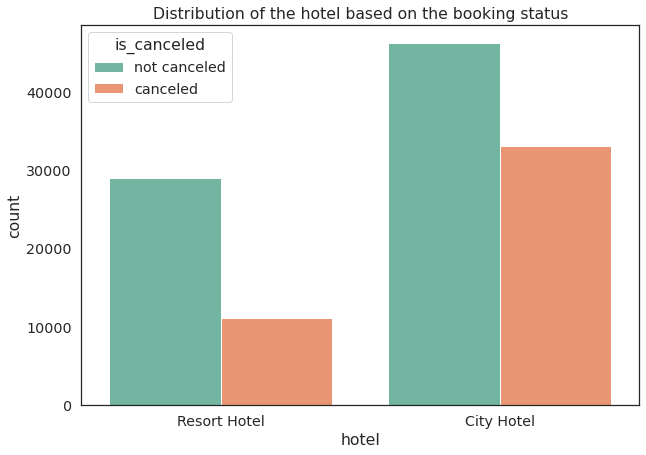

In [10]:
# Parameters
plt.rcParams['figure.figsize'] = [10, 7]
sns.set(style = 'white', font_scale = 1.3)

#1: canceled and 0: not canceled
df['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)

# Plot
dist = sns.countplot(df['hotel'], hue = 'is_canceled', data = df, palette = 'Set2');

dist.set(title = "Distribution of the hotel based on the booking status");

## Various booking status by year

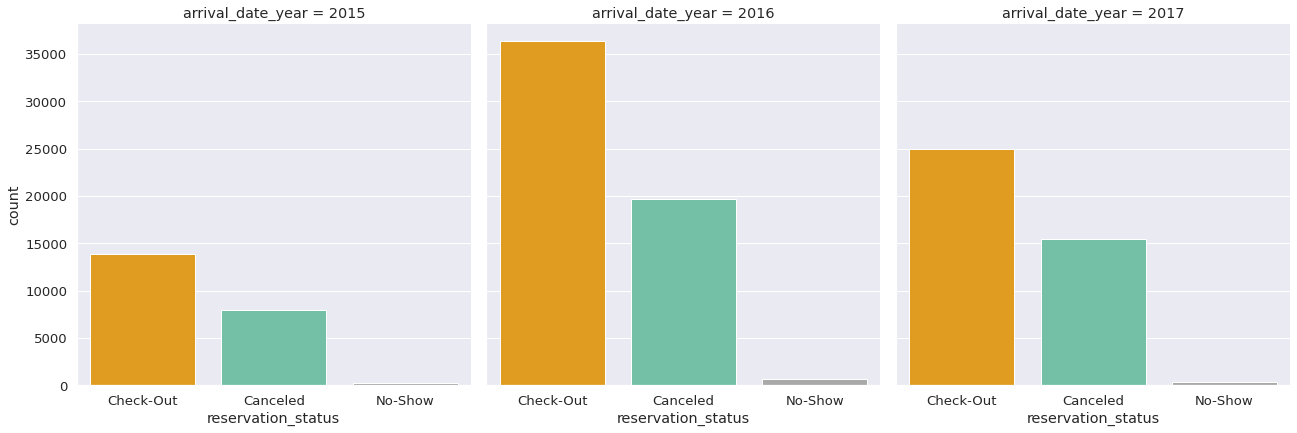

In [11]:
# Parameters
plt.rcParams['figure.figsize'] = [15, 7]
sns.set(style = 'darkgrid', font_scale = 1.2)

# catplot (countplot)
cat = sns.catplot(x = 'reservation_status', col = 'arrival_date_year', kind = 'count', data = df,
            height = 6, palette = ['orange', 'mediumaquamarine', 'darkgrey']);

**Preprocessing**

In [12]:
# Unique Object values
a = df.select_dtypes(object).columns
for i in a:
    print (i, df[i].nunique())

hotel 2
is_canceled 2
arrival_date_month 12
meal 5
country 177
market_segment 8
distribution_channel 5
reserved_room_type 10
assigned_room_type 12
deposit_type 3
customer_type 4
reservation_status 3
reservation_status_date 926


In [13]:
# columns with dtype object
categorical_features = list(df.select_dtypes(include=['object']).columns)
categorical_features.remove('reservation_status_date')

# Label Encoder 
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    df[feature] = df[feature].astype(str)
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

In [14]:
# Filling agent null values 
df.agent.fillna(0, inplace = True)
df.agent = df.agent.astype(int)

##Correlation between columns found out by pearson method w.r.t 'is_canceled'

In [15]:
# Checking the correlation to choose the features to use in the Modelling
# Choosing the threshold Correlation as 0.04 (except for children)

df.corr(method = 'pearson')['is_canceled']

hotel                             0.136531
is_canceled                       1.000000
lead_time                        -0.293123
arrival_date_year                -0.016660
arrival_date_month                0.001491
arrival_date_week_number         -0.008148
arrival_date_day_of_month         0.006130
stays_in_weekend_nights           0.001791
stays_in_week_nights             -0.024765
adults                           -0.060017
children                         -0.005036
babies                            0.032491
meal                              0.017678
country                          -0.264223
market_segment                   -0.059338
distribution_channel             -0.167600
is_repeated_guest                 0.084793
previous_cancellations           -0.110133
previous_bookings_not_canceled    0.057358
reserved_room_type                0.061282
assigned_room_type                0.176028
booking_changes                   0.144381
deposit_type                     -0.468634
agent      

In [16]:
df['total_guest'] = df['adults'] +  df['children'] + df['babies']

In [17]:
# The features that are going to be used for the training and testing

df_hotel = df[['hotel', 'lead_time', 'adults', 'children', 'babies', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
   'previous_cancellations', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
   'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'adr', 'total_guest', 'is_canceled']].copy()

df_hotel.head()

,hotel,lead_time,adults,children,babies,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr,total_guest,is_canceled
0,1,342,2,0,0,135,3,1,0,0,2,2,3,0,0,0,0,0,0.0,2,1
1,1,737,2,0,0,135,3,1,0,0,2,2,4,0,0,0,0,0,0.0,2,1
2,1,7,1,0,0,59,3,1,0,0,0,2,0,0,0,0,0,0,75.0,1,1
3,1,13,1,0,0,59,2,0,0,0,0,0,0,0,304,0,0,0,75.0,1,1
4,1,14,2,0,0,59,6,3,0,0,0,0,0,0,240,0,0,1,98.0,2,1


In [18]:
#converting dataframe into array
dataset = df_hotel.values
dataset

array([[  1.  , 342.  ,   2.  , ...,   0.  ,   2.  ,   1.  ],
       [  1.  , 737.  ,   2.  , ...,   0.  ,   2.  ,   1.  ],
       [  1.  ,   7.  ,   1.  , ...,  75.  ,   1.  ,   1.  ],
       ...,
       [  0.  ,  34.  ,   2.  , ..., 157.71,   2.  ,   1.  ],
       [  0.  , 109.  ,   2.  , ..., 104.4 ,   2.  ,   1.  ],
       [  0.  , 205.  ,   2.  , ..., 151.2 ,   2.  ,   1.  ]])

In [19]:
#We now split our dataset into input features (X) and the feature we wish to predict (Y)
X = dataset[:,0:20]
Y = dataset[:,20]

In [20]:
from sklearn import preprocessing

In [21]:
min_max_scaler = preprocessing.MinMaxScaler()

In [22]:
X_scale = min_max_scaler.fit_transform(X)

In [23]:
X_scale


array([[1.        , 0.46404342, 0.03636364, ..., 0.        , 0.00118009,
        0.03636364],
       [1.        , 1.        , 0.03636364, ..., 0.        , 0.00118009,
        0.03636364],
       [1.        , 0.00949796, 0.01818182, ..., 0.        , 0.01505259,
        0.01818182],
       ...,
       [0.        , 0.04613297, 0.03636364, ..., 0.8       , 0.03035118,
        0.03636364],
       [0.        , 0.14789688, 0.03636364, ..., 0.        , 0.02049061,
        0.03636364],
       [0.        , 0.27815468, 0.03636364, ..., 0.4       , 0.02914704,
        0.03636364]])

In [24]:
#Split dataset into a training set, a validation set and a test set
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [26]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [27]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(83573, 20) (17908, 20) (17909, 20) (83573,) (17908,) (17909,)


## Building our first Neural Network

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
model = Sequential([ Dense(32, activation='relu', input_shape=(20,)), Dense(32, activation='relu'), Dense(1, activation='sigmoid'),])

In [30]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
2612/2612 [==============================] - 3s 1ms/step - loss: 0.5694 - accuracy: 0.7223 - val_loss: 0.4927 - val_accuracy: 0.7679
Epoch 2/100
2612/2612 [==============================] - 3s 1ms/step - loss: 0.4816 - accuracy: 0.7665 - val_loss: 0.4598 - val_accuracy: 0.7781
Epoch 3/100
2612/2612 [==============================] - 3s 1ms/step - loss: 0.4619 - accuracy: 0.7745 - val_loss: 0.4484 - val_accuracy: 0.7784
Epoch 4/100
2612/2612 [==============================] - 3s 1ms/step - loss: 0.4522 - accuracy: 0.7791 - val_loss: 0.4430 - val_accuracy: 0.7877
Epoch 5/100
2612/2612 [==============================] - 3s 1ms/step - loss: 0.4463 - accuracy: 0.7828 - val_loss: 0.4358 - val_accuracy: 0.7867
Epoch 6/100
2612/2612 [==============================] - 3s 1ms/step - loss: 0.4408 - accuracy: 0.7861 - val_loss: 0.4326 - val_accuracy: 0.7955
Epoch 7/100
2612/2612 [==============================] - 3s 1ms/step - loss: 0.4354 - accuracy: 0.7888 - val_loss: 0.4243 - val_ac

## Calculating the accuracy on test data

In [32]:
model.evaluate(X_test, Y_test)[1]

560/560 [==============================] - 0s 854us/step - loss: 0.3664 - accuracy: 0.8215


0.8214864134788513

As we see above, we have got the accuracy of 82.14%

## Visualizing Loss and Accuracy for Train and Validation sets

In [33]:
#Visualizations
import matplotlib.pyplot as plt

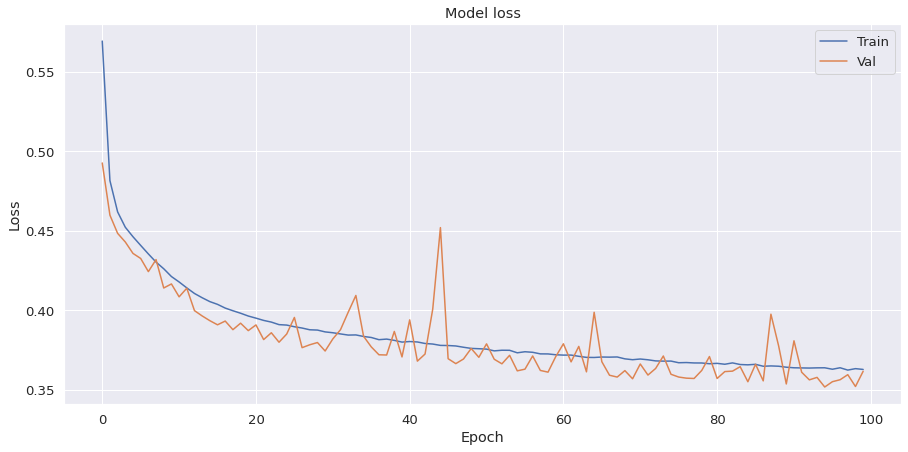

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


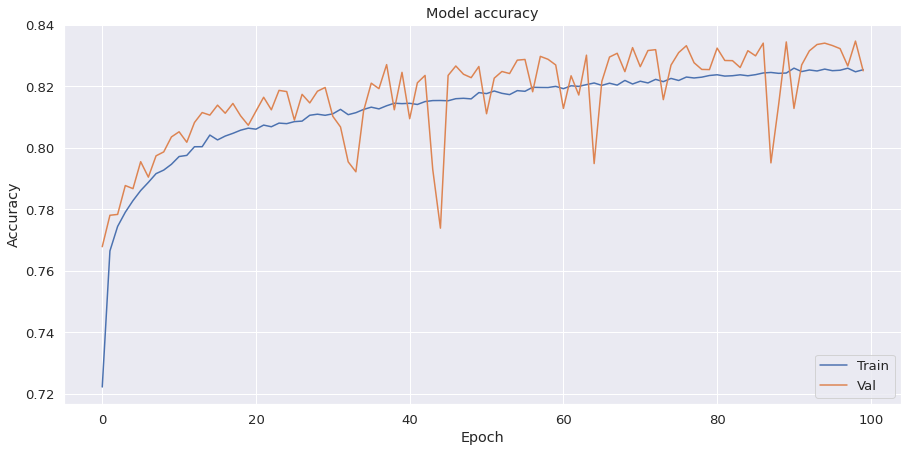

In [35]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Adding Regularization to our network

 Let’s formulate with a neural network that will badly overfit on our training set

Here, we’ve made a much larger model and we’ve use the Adam optimizer. Adam is one of the most common optimizers we use, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster.

In [36]:
#introducing regularization to our neural network
model_2 = Sequential([ Dense(1000, activation='relu', input_shape=(20,)), Dense(1000, activation='relu'),Dense(1000, activation='relu'),Dense(1000, activation='relu'),Dense(1, activation='sigmoid'),])

In [37]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
2612/2612 [==============================] - 93s 36ms/step - loss: 0.3991 - accuracy: 0.8025 - val_loss: 0.3689 - val_accuracy: 0.8236
Epoch 2/100
2612/2612 [==============================] - 94s 36ms/step - loss: 0.3686 - accuracy: 0.8213 - val_loss: 0.3585 - val_accuracy: 0.8286
Epoch 3/100
2612/2612 [==============================] - 93s 36ms/step - loss: 0.3567 - accuracy: 0.8287 - val_loss: 0.3448 - val_accuracy: 0.8356
Epoch 4/100
2612/2612 [==============================] - 93s 35ms/step - loss: 0.3515 - accuracy: 0.8319 - val_loss: 0.3481 - val_accuracy: 0.8370
Epoch 5/100
2612/2612 [==============================] - 93s 36ms/step - loss: 0.3466 - accuracy: 0.8351 - val_loss: 0.3410 - val_accuracy: 0.8377
Epoch 6/100
2612/2612 [==============================] - 95s 36ms/step - loss: 0.3427 - accuracy: 0.8371 - val_loss: 0.3340 - val_accuracy: 0.8427
Epoch 7/100
2612/2612 [==============================] - 97s 37ms/step - loss: 0.3397 - accuracy: 0.8396 - val_loss: 0

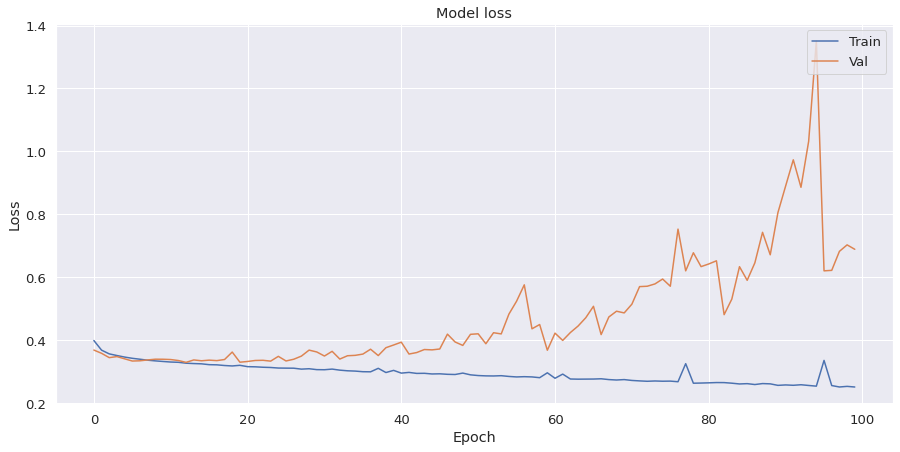

In [39]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

This is a clear sign of over-fitting. The training loss is decreasing, but the validation loss is way above the training loss and increasing (past the inflection point)

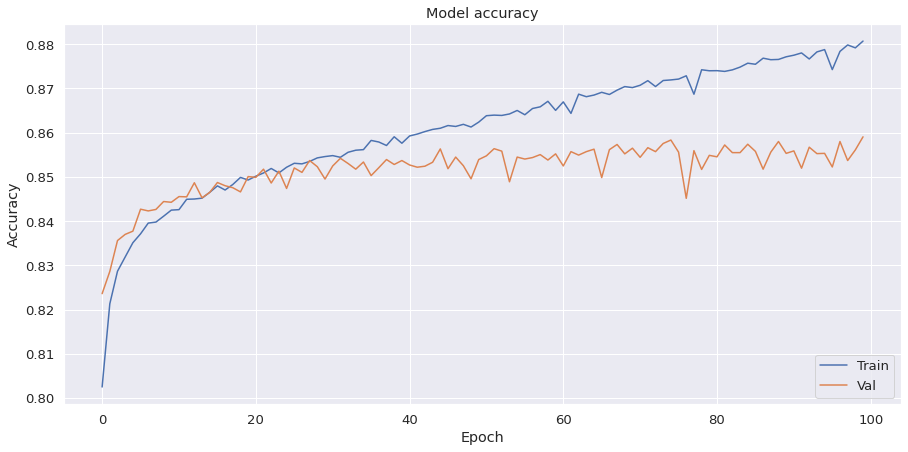

In [40]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### We can see a clearer divergence between train and validation accuracy

In [41]:
#introducing regularization to our neural network
from keras.layers import Dropout
from keras import regularizers

In [42]:
model_3 = Sequential([ Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(20,)),Dropout(0.3),Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

In [43]:
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
hist_3 = model_3.fit(X_train, Y_train,  batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
2612/2612 [==============================] - 122s 47ms/step - loss: 0.8128 - accuracy: 0.7377 - val_loss: 0.5938 - val_accuracy: 0.7718
Epoch 2/100
2612/2612 [==============================] - 121s 46ms/step - loss: 0.6151 - accuracy: 0.7597 - val_loss: 0.5911 - val_accuracy: 0.7730
Epoch 3/100
2612/2612 [==============================] - 122s 47ms/step - loss: 0.6130 - accuracy: 0.7590 - val_loss: 0.5960 - val_accuracy: 0.7769
Epoch 4/100
2612/2612 [==============================] - 121s 46ms/step - loss: 0.6117 - accuracy: 0.7592 - val_loss: 0.6186 - val_accuracy: 0.7525
Epoch 5/100
2612/2612 [==============================] - 120s 46ms/step - loss: 0.6117 - accuracy: 0.7579 - val_loss: 0.5857 - val_accuracy: 0.7764
Epoch 6/100
2612/2612 [==============================] - 123s 47ms/step - loss: 0.6096 - accuracy: 0.7591 - val_loss: 0.5946 - val_accuracy: 0.7746
Epoch 7/100
2612/2612 [==============================] - 122s 47ms/step - loss: 0.6099 - accuracy: 0.7585 - val_

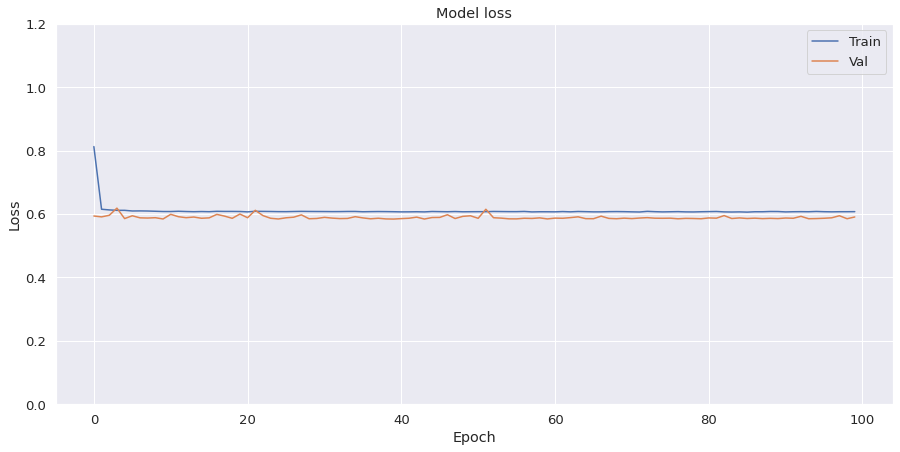

In [45]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

### We can see that the validation loss much more closely matches our training loss

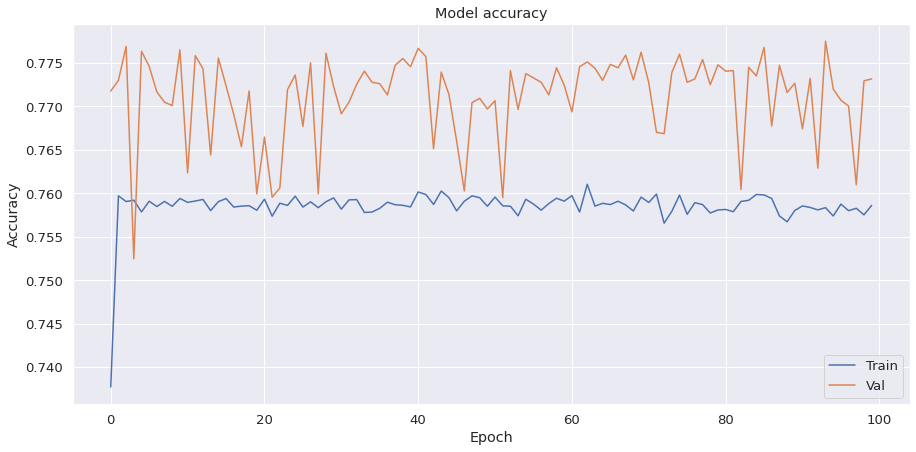

In [46]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Compared to our model in Model 2, we’ve reduced overfitting substantially! And that’s how we apply our regularization techniques to reduce overfitting to the training set.

## Consolidated Summary
### we’ve written Python code to:

*   Explore and Process the Data
*   Build and Train our Neural Network
*   Visualize Loss and Accuracy
*   Add Regularization to our Neural Network







**References**



*   [Kaggle](https://www.kaggle.com/)
*   [Scikit](https://scikit-learn.org/stable/)
*   [Towards Data Science](https://towardsdatascience.com/)




Copyright 2020 Keval Vankudre

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

